# Diabetes Prediction

## EDA

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [4]:
df = pd.read_csv(r"C:\Users\dikhe\OneDrive\Desktop\end_project_logistic_R\Dataset\diabetes.csv")
df = pd.DataFrame(df)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
df.rename(columns={'DiabetesPedigreeFunction': 'DPG'}, inplace=True)

In [6]:
df.rename(columns={'Outcome': 'Target'}, inplace=True)

In [7]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DPG,Age,Target
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [8]:
#No null values present
df.isnull().sum()

Pregnancies      0
Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
DPG              0
Age              0
Target           0
dtype: int64

In [9]:
df.dtypes

Pregnancies        int64
Glucose            int64
BloodPressure      int64
SkinThickness      int64
Insulin            int64
BMI              float64
DPG              float64
Age                int64
Target             int64
dtype: object

In [10]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DPG,Age,Target
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [11]:
#Minimun values in some rows are 0 which is not possible i.e. glucose,skinthickness etc.
df.BMI = df.BMI.replace(0,df.BMI.mean())
df.Glucose = df.Glucose.replace(0,df.Glucose.mean())
df.BloodPressure = df.BloodPressure.replace(0,df.BloodPressure.mean())
df.SkinThickness = df.SkinThickness.replace(0,df.SkinThickness.mean())
df.Insulin = df.Insulin.replace(0,df.Insulin.mean())

In [12]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DPG,Age,Target
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,26.606479,118.660163,32.450805,0.471876,33.240885,0.348958
std,3.369578,30.436016,12.115932,9.631241,93.080358,6.875374,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,20.536458,79.799479,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


<Axes: >

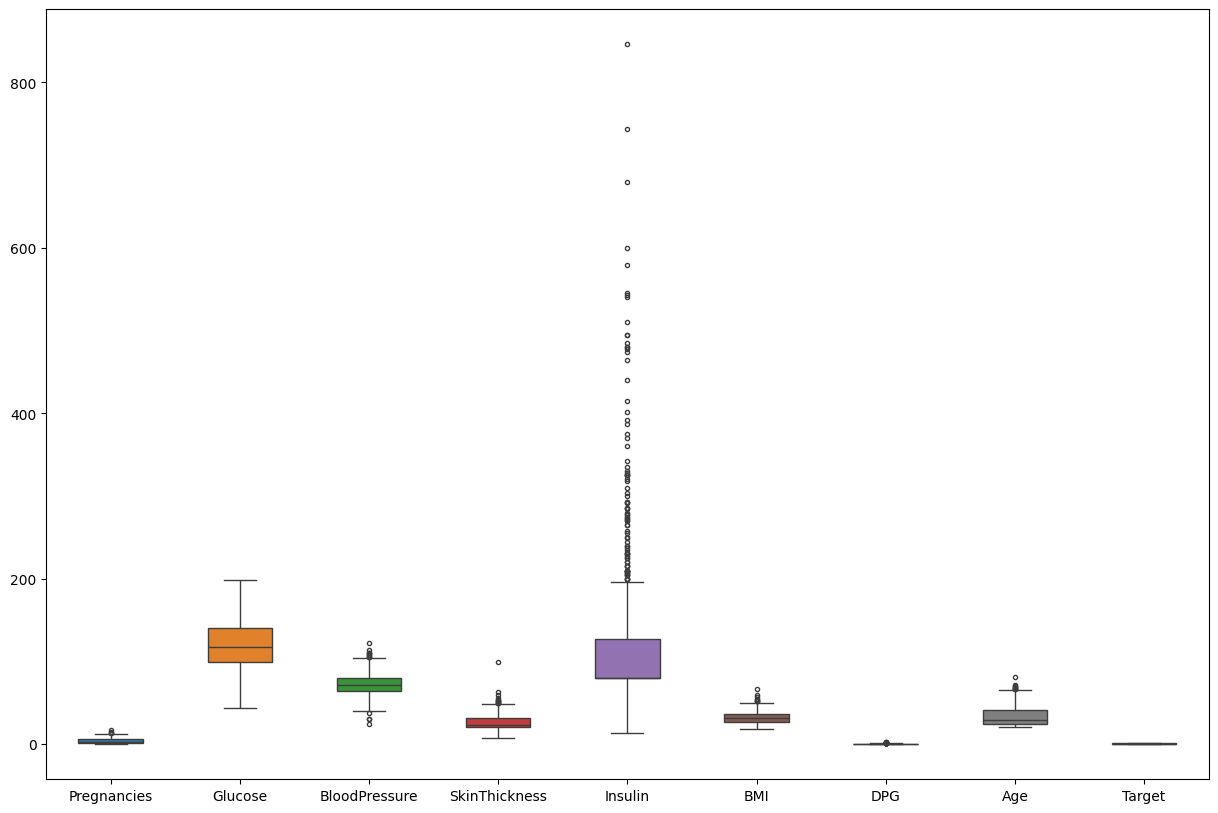

In [13]:
fig,ax=plt.subplots(figsize=(15,10))
sns.boxplot(df,width=0.5,fliersize=3)

In [14]:
## Insulin and Blood Pressure contain a lot of outliers

In [15]:
#No duplicates found
df[df.duplicated()!=0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DPG,Age,Target


In [16]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DPG', 'Age', 'Target'],
      dtype='object')

In [17]:
#The dataset is balanced
df[df["Target"]==1].count()

Pregnancies      268
Glucose          268
BloodPressure    268
SkinThickness    268
Insulin          268
BMI              268
DPG              268
Age              268
Target           268
dtype: int64

## Model Training

### Logistic Regression

<Axes: >

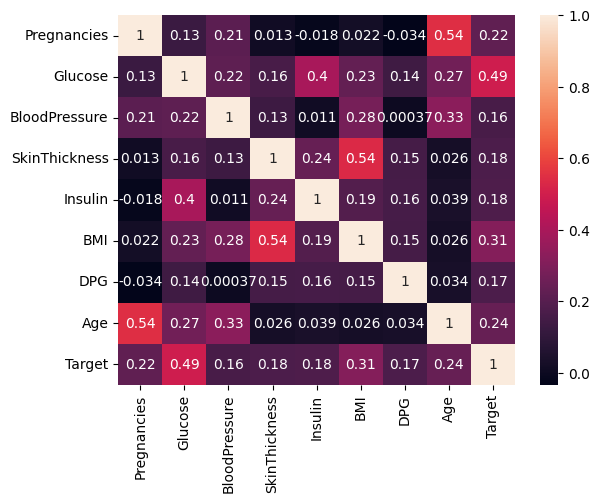

In [18]:
sns.heatmap(df.corr(),annot=True)

In [19]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DPG,Age,Target
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1


In [20]:
# segregate the dependent and independent variable
x = df.drop('Target',axis='columns')
y = df.Target


In [21]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=0)

In [22]:
import pickle
from sklearn.preprocessing import StandardScaler
def scaler_standard(x_train,x_test):
    scaler = StandardScaler()
    x_train_scaled = scaler.fit_transform(x_train)
    x_test_scaled = scaler.fit_transform(x_test)

    file = open(r'C:/Users/dikhe/OneDrive/Desktop/Diabetes_prediction_Decision_trees/my_venv/Model/StandardScaler.pkl','wb')
    pickle.dump(scaler,file)
    file.close()

    return x_train_scaled,x_test_scaled

In [23]:
x_train_scaled,x_test_scaled=scaler_standard(x_train,x_test)

In [23]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(x_train_scaled,y_train)

LogisticRegression()

In [24]:
#Hyperparameter Tuning
#GridSearch CV
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

parameters = {
                'penalty':['l1','l2'],
                'C': np.logspace(-3,3,7),
                'solver': ['netwon-cg','lbfgs','liblinear']
            }

In [26]:
newlr= LogisticRegression()
clf = GridSearchCV(newlr,param_grid = parameters,scoring = 'accuracy',cv=10)
clf.fit(x_train_scaled,y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2'],
                         'solver': ['netwon-cg', 'lbfgs', 'liblinear']},
             scoring='accuracy')

In [27]:
clf.best_params_

{'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}

In [28]:
clf.best_score_

0.763793103448276

In [29]:
y_pred=clf.predict(x_test_scaled)
from sklearn.metrics import confusion_matrix
conf_mat=confusion_matrix(y_test,y_pred)
conf_mat

array([[116,  14],
       [ 26,  36]], dtype=int64)

In [25]:
from sklearn.metrics import confusion_matrix

In [26]:
TP=conf_mat[0][0]
FP=conf_mat[1][0]
FN=conf_mat[0][1]
TN=conf_mat[1][1]

NameError: name 'conf_mat' is not defined

In [31]:
accuracy = (float)(TP+TN)/(TP+TN+FP+FN)
P = (float)(TP)/(TP+FP)
R = (float)(TP)/(TP+FN)
F1_score = (float)(2*P*R)/(P+R)
F2_score = (float)(5*P*R)/(P+R)

In [32]:
accuracy,P,R,F1_score,F2_score

(0.7916666666666666,
 0.8169014084507042,
 0.8923076923076924,
 0.8529411764705882,
 2.13235294117647)

In [33]:
log_reg=LogisticRegression(penalty='l2',C=1,solver='liblinear')
log_reg.fit(x_train_scaled,y_train)

LogisticRegression(C=1, solver='liblinear')

In [36]:
import pickle
file = open(r'C:/Users/dikhe/OneDrive/Desktop/Diabetes_prediction_Decision_trees/my_venv/Model/prediction.pkl','wb')
pickle.dump(log_reg,file)
file.close()

### Decision Trees

In [27]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB,BernoulliNB
from sklearn.metrics import classification_report


In [28]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DPG,Age,Target
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1


In [29]:
x = df.drop('Target',axis=1)
y = df.Target


In [30]:
params = {
    'criterion':['gini','entropy','log_loss'],
    'splitter':['best','random'],
    'max_depth':[1,2,3,4,5],
    'max_features':['auto','sqrt','log2']
    }


In [31]:
decision_tree = DecisionTreeClassifier()
clf = GridSearchCV(decision_tree,param_grid=params,cv=5,scoring='accuracy')

In [32]:
clf.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [33]:
clf.best_params_

{'criterion': 'log_loss',
 'max_depth': 2,
 'max_features': 'log2',
 'splitter': 'best'}

In [34]:
y_pred=clf.predict(x_test)

In [35]:
conf = confusion_matrix(y_test,y_pred)


In [36]:
classification_report(y_test,y_pred)

'              precision    recall  f1-score   support\n\n           0       0.79      0.86      0.82       130\n           1       0.64      0.52      0.57        62\n\n    accuracy                           0.75       192\n   macro avg       0.71      0.69      0.70       192\nweighted avg       0.74      0.75      0.74       192\n'

In [37]:
Precision = conf[0][0]/(conf[0][0]+conf[0][1])
Recall = conf[0][0]/(conf[0][0]+conf[1][0])
Recall,Precision

(0.7887323943661971, 0.8615384615384616)

In [122]:
import pickle
file = open('C:/Users/dikhe/OneDrive/Desktop/Diabetes_prediction_Decision_trees/my_venv/Model/Prediction.pkl','wb')
pickle.dump(clf,file)
file.close()

### Support Vector Machines

In [ ]:
params_svc = {
    'C':[0.1,1,10,100,1000],
    'gamma':[1,0.1,0.01,0.001,0.0001],
    'kernel':['linear','poly','rbf']
}

In [ ]:
classifier_svc = GridSearchCV(SVC(),param_grid=params_svc,cv=3,refit=True,verbose=3)

In [ ]:
classifier_svc.fit(x_train,y_train)

In [ ]:
classifier_svc.best_params_

NameError: name 'classifier_svc' is not defined